In [14]:
import pandas as pd 
import numpy as np
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


**Predictive features:**

1. 'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
2. 'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
3. 'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');


**Dependent variables:**

4. 'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
5. 'stabf': a categorical (binary) label ('stable' or 'unstable').
Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).

**NOTE**

Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).

In [3]:
df['stabf'].value_counts().to_frame()

,stabf
unstable,6380
stable,3620


In [4]:
# we can notice that the column stab has distint/unique values therefore we cannot use the traditional classification on this column.
df['stab'].value_counts().to_frame()

,stab
0.055347,1
0.007779,1
0.053271,1
0.060622,1
0.034466,1
...,...
0.001950,1
0.019006,1
0.041277,1
0.003277,1


From the code above we can notice an imbalance within the target classes. I would first check for the accuracy and performance of the model without balancing the target classes.

In [5]:
# droping on of the dependent variables because of the direct relation between the dependent variables as stated in the text above.
df=df.drop('stab',axis=1)


In [6]:
df.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stabf'],
      dtype='object')

In [7]:
# Creating our x and y data for training.
x = df.drop('stabf',axis=1)
print(x.columns.to_list())
print('-'*40,'features','-'*40)
y = df['stabf']
print(y.name)
print('-'*40,'Target','-'*40)


['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4']
---------------------------------------- features ----------------------------------------
stabf
---------------------------------------- Target ----------------------------------------


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state=1)
print('The shape of the train dataset for X:{0} and y: {2} \nThe shape of the test dataset for X:{1} and y:{3} '.format(x_train.shape,x_test.shape, y_train.shape, y_test.shape))
print('-'*100)
y_train.value_counts().to_frame()

The shape of the train dataset for X:(8000, 12) and y: (8000,) 
The shape of the test dataset for X:(2000, 12) and y:(2000,) 
----------------------------------------------------------------------------------------------------


,stabf
unstable,5092
stable,2908


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalised_x_train= scaler.fit_transform(x_train, y_train)
normalised_x_train = pd.DataFrame(normalised_x_train,columns= x.columns)

normalised_x_test = scaler.fit_transform(x_test.values)
normalised_x_test = pd.DataFrame(normalised_x_test,columns= x.columns)




In [10]:
normalised_x_train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


In [11]:
normalised_x_test.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.592163,-0.420565,1.472472,1.093036,0.426786,-1.504594,-0.792677,1.600201,-0.925703,1.175287,-1.492644,1.086291
1,0.199183,0.364543,-0.190076,-0.518473,-0.229402,-1.071766,0.427103,1.052337,-1.655910,-0.395949,1.412703,1.227535
2,-1.086035,-0.321834,-0.873505,0.011761,-0.977094,0.094896,0.813041,0.751381,1.450284,-1.444370,0.654216,-1.679799
3,-0.087014,-1.113357,0.361518,-1.684316,0.792280,-1.649041,0.410662,-0.084473,0.066085,-1.679450,-0.349573,1.057439
4,0.873004,1.425833,0.080476,1.681022,-0.154247,-0.024315,-0.197525,0.485988,0.119716,-1.475773,0.957057,-0.817608


# **QUESTION: What is the accuracy on the test set using the XGboost classifier? In 4 decimal places.**

# **RandomForestClassifier**

In [12]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier()
RFC.fit(normalised_x_train, y_train)
RFC_pred=RFC.predict(normalised_x_test)


In [15]:
# Check the model performance
print(classification_report(y_test, RFC_pred))

              precision    recall  f1-score   support

      stable       0.91      0.87      0.89       712
    unstable       0.93      0.95      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.92      0.92      0.92      2000



In [52]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, RFC_pred )
print( 'Accuracy: {}' .format(round(accuracy,4 ) ))

Accuracy: 0.921


# **QUESTION: What is the accuracy on the test set using the XGboost classifier? In 4 decimal places.**

# **XGBClassifier**

In [17]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(normalised_x_train, y_train)
XGB_pred=XGB.predict(normalised_x_test)

In [18]:
# Check the model performance
print(classification_report(y_test, XGB_pred))

              precision    recall  f1-score   support

      stable       0.92      0.84      0.88       712
    unstable       0.92      0.96      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000



In [51]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, XGB_pred )
print( 'Accuracy: {}' .format(round(accuracy,4 ) ))

Accuracy: 0.919


# **QUESTION: What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.**

# **LGB Classifier**

In [21]:
import lightgbm as lgb
LGB = lgb.LGBMClassifier()
LGB.fit(normalised_x_train, y_train)
LGB_pred=LGB.predict(normalised_x_test)

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, LGB_pred )
print( 'Accuracy: {}' .format(round(accuracy,4 ) ))

Accuracy: 0.9355


# **QUESTION: Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?**

# **ExtraTreeClassifier**

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier( random_state=1)
ETC.fit(normalised_x_train, y_train)
ETC_pred = ETC.predict(normalised_x_test)


In [39]:
feature_importance = ETC.feature_importances_

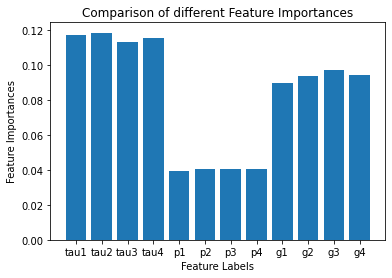

In [44]:
# Plotting a Bar Graph to compare the models
plt.bar(x.columns, feature_importance)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

# Answer:We can see that tau2 has the highest feature importance and p1 has the least feature importance.

## **DecisionTreeClassifier**

In [23]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=1)
DTC.fit(normalised_x_train, y_train)


DecisionTreeClassifier(random_state=1)

In [24]:
DTC_pred = DTC.predict(normalised_x_test)

**Accuracy**

In [47]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=DTC_pred)
print( 'Accuracy: {}' .format(round(accuracy,4 ) ))

Accuracy: 0.8535


**Confusion Matrix** 

In [26]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix,classification_report

cnf_mat = confusion_matrix(y_true=y_test, y_pred=DTC_pred, labels=[ 'unstable' , 'stable' ])
cnf_mat

array([[1141,  147],
       [ 146,  566]])

In [27]:
# Check the model performance
print(classification_report(y_test, DTC_pred))

              precision    recall  f1-score   support

      stable       0.79      0.79      0.79       712
    unstable       0.89      0.89      0.89      1288

    accuracy                           0.85      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.85      0.85      0.85      2000



**F1-Score**

In [28]:
f1 = f1_score(y_true=y_test, y_pred=DTC_pred, pos_label= 'stable' )
print( 'F1: {}' .format(round(f1* 100 ), 2 ))

F1: 79


**Precision**

In [29]:
#precision for stable label
precision = precision_score(y_true=y_test, y_pred= DTC_pred, pos_label= 'stable')
print( 'Precision: {}' .format(round(precision* 100 ), 2 )) 

Precision: 79


In [30]:
#precision for unstable label
precision = precision_score(y_true=y_test, y_pred= DTC_pred, pos_label= 'unstable')
print( 'Precision: {}' .format(round(precision* 100 ), 2 )) 

Precision: 89


**Recall**

In [31]:
# Recall for stable label
recall = recall_score(y_true=y_test, y_pred=DTC_pred, pos_label='stable' )
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 79


In [32]:
# Recall for unstable label
recall = recall_score(y_true=y_test, y_pred=DTC_pred, pos_label='unstable' )
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 89


In [33]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.63882 to fit



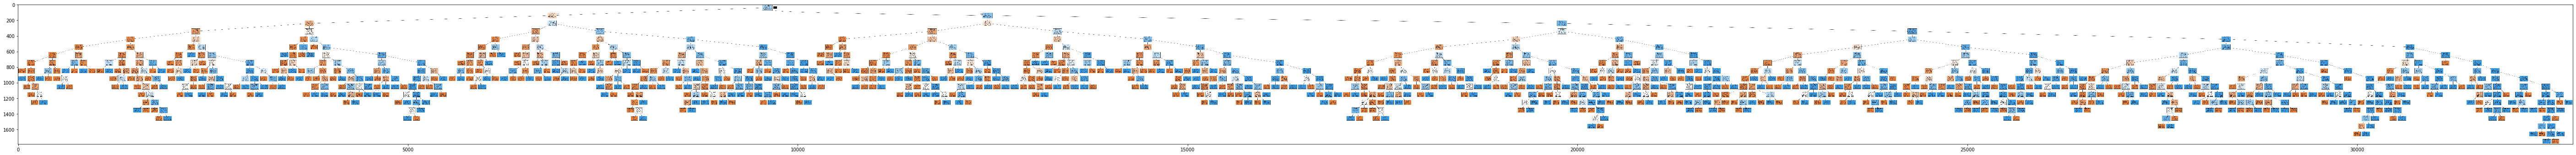

In [34]:
dot_data = StringIO()
filename = "energytree.png"
featureNames = normalised_x_train.columns
out=tree.export_graphviz(DTC,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [36]:
# Check the model performance
print(classification_report(y_test, ETC_pred))

              precision    recall  f1-score   support

      stable       0.94      0.85      0.89       712
    unstable       0.92      0.97      0.94      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = XGBClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model,normalised_x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.921 (0.011)
